In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import random

from sklearn.linear_model import LinearRegression

In [2]:
# generate the data (training and test)
theRange = 200
numDataPoints = 200
theSplit = int(0.7*numDataPoints)

x = np.linspace(-theRange, theRange+1, numDataPoints)
y = [(x[i]**3 + x[i]**2 + x[i] + random.uniform(-(theRange**3)/5.0,(theRange**3)/5.0)) for i in range(len(x))]
y = np.array(y)

xt = np.zeros([len(x),3])
xt[:,0] = [i**3 for i in x]
xt[:,1] = [i**2 for i in x]
xt[:,2] = x


theIndices = range(numDataPoints)
random.shuffle(theIndices)
trainIndices = theIndices[:theSplit]
testIndices = theIndices[theSplit:]

trainSetX = xt[trainIndices,:]
trainSetY = y[trainIndices]
testSetX = xt[testIndices,:]
testSetY = y[testIndices]

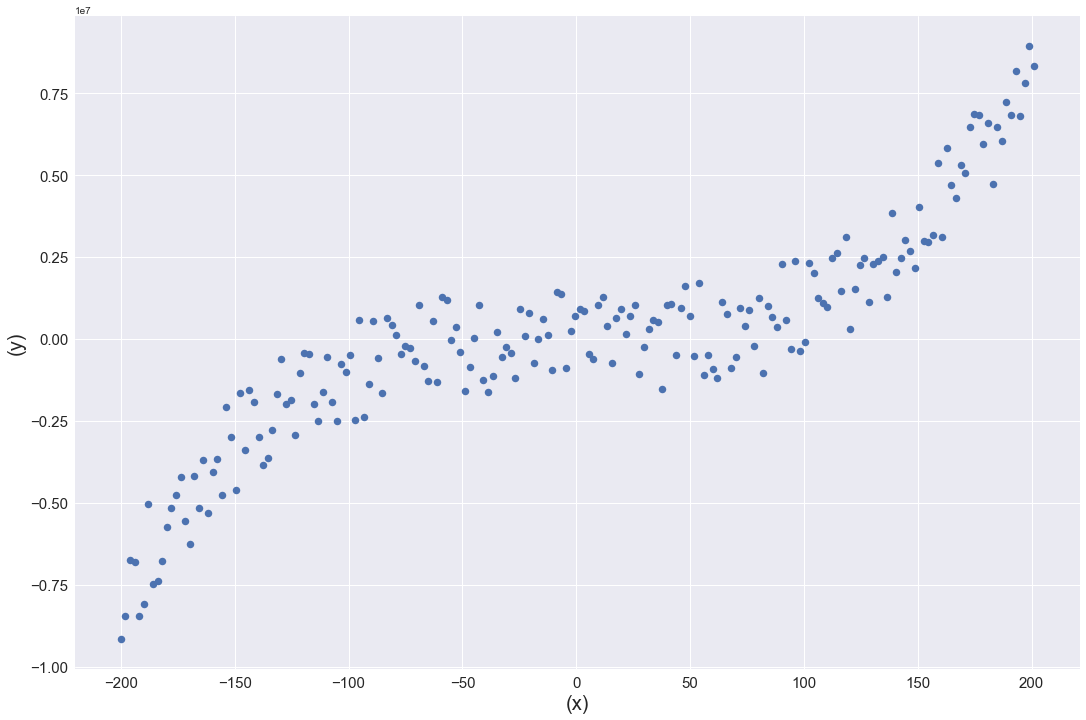

In [3]:
# plot the data
plt.figure(figsize=[18,12])
plt.plot(x,y,'.',markersize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('(x)',fontsize=20)
plt.ylabel('(y)',fontsize=20)
plt.show()

In [4]:
# initialise and fit the model to the data
model = LinearRegression(normalize=True)
model.fit (trainSetX,trainSetY)

# get the regression parameters and intercept
a1 = model.coef_[0]
a2 = model.coef_[1]
a3 = model.coef_[2]
b = model.intercept_

In [5]:
print 'Training Set Scrore:', model.score(trainSetX,trainSetY)

Training Set Scrore: 0.9196141156914119


In [6]:
print 'Test Set Scrore:', model.score(testSetX,testSetY)

Test Set Scrore: 0.9344772870087314


In [7]:
# evaluate the hypothesis
yt=[]
for i in range(len(x)):
    yt.append(a1*xt[i,0] + a2*xt[i,1] + a3*xt[i,2] + b)

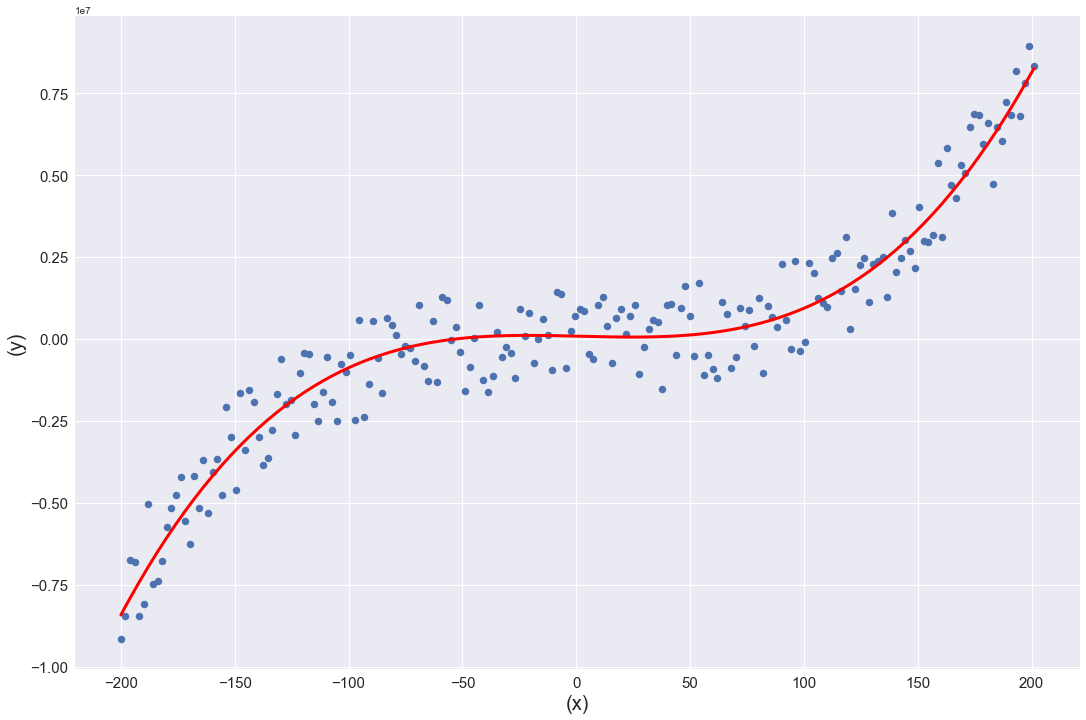

In [8]:
# superimpose the plot of the hypothesis on that of the data
plt.figure(figsize=[18,12])
plt.plot(x,y,'.',markersize=15)
plt.plot(x,yt,'r',linewidth=3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('(x)',fontsize=20)
plt.ylabel('(y)',fontsize=20)
plt.show()